# **Import the libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [2]:
sns.set_palette('viridis')
sns.color_palette(palette='viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [3]:
plt.set_loglevel('warning')

# **Import the Dataset**

[Chosen Dataset](https://www.kaggle.com/datasets/altavish/boston-housing-dataset)

In [4]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "altavish/boston-housing-dataset",
  "HousingData.csv"
)

Using Colab cache for faster access to the 'boston-housing-dataset' dataset.


In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# **Data Visualization**

## Heatmap

A heatmap represents each missing value as a color block, giving a clearer sense of the concentration of missing data across different columns.

<Axes: >

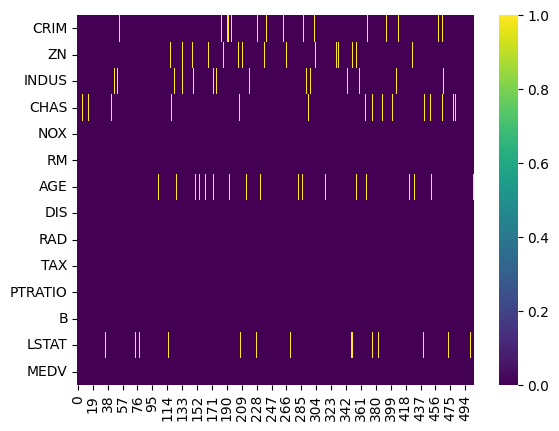

In [7]:
sns.heatmap(df.isnull().T, cmap='viridis', square=False, norm=None)

In this case, the missing values are in the CRIM, ZN, INDUS, CHAS, AGE, and LSTAT columns. I keep non-square representation because there are much more entries than columns. Also, I don't use norm(normalization) as it is not needed for null-values spotting, but it would be useful if I wanted to see the distribution of values.

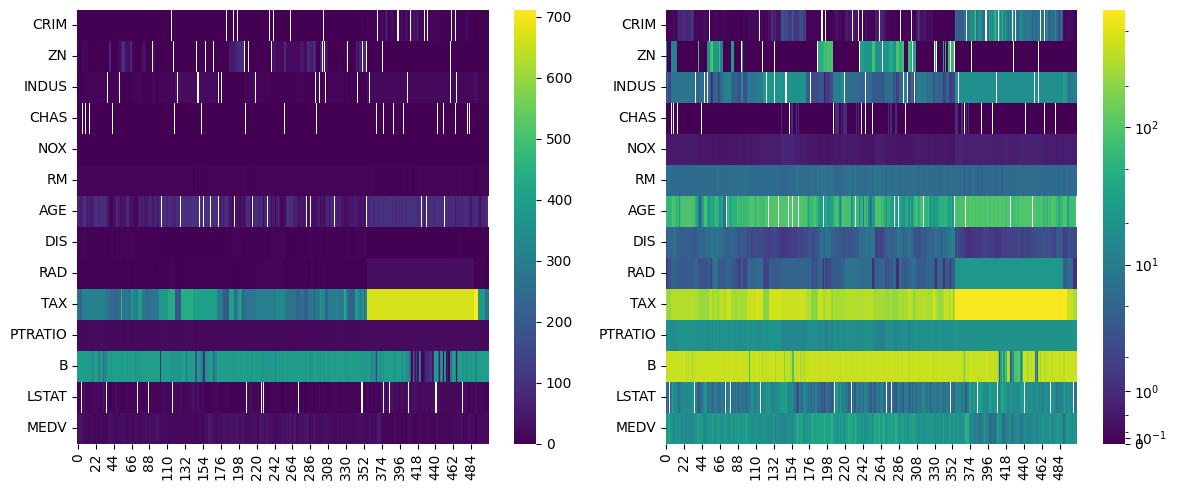

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(df.T, cmap='viridis', ax=axes[0])
sns.heatmap(df.T, cmap='viridis', norm=mcolors.AsinhNorm(), ax=axes[1])

plt.tight_layout()

This is an example with visualization. From the first one, it is hard to understand the patterns of the data, while in the second one TAX, B, and RAD show consistently high values across most observations, indicating limited variability. In contrast, CRIM, ZN, and CHAS display sparse high-intensity regions, suggesting skewed distributions. Continuous variables such as AGE, DIS, RM, and LSTAT demonstrate gradual variation across samples, reflecting more heterogeneous behavior.

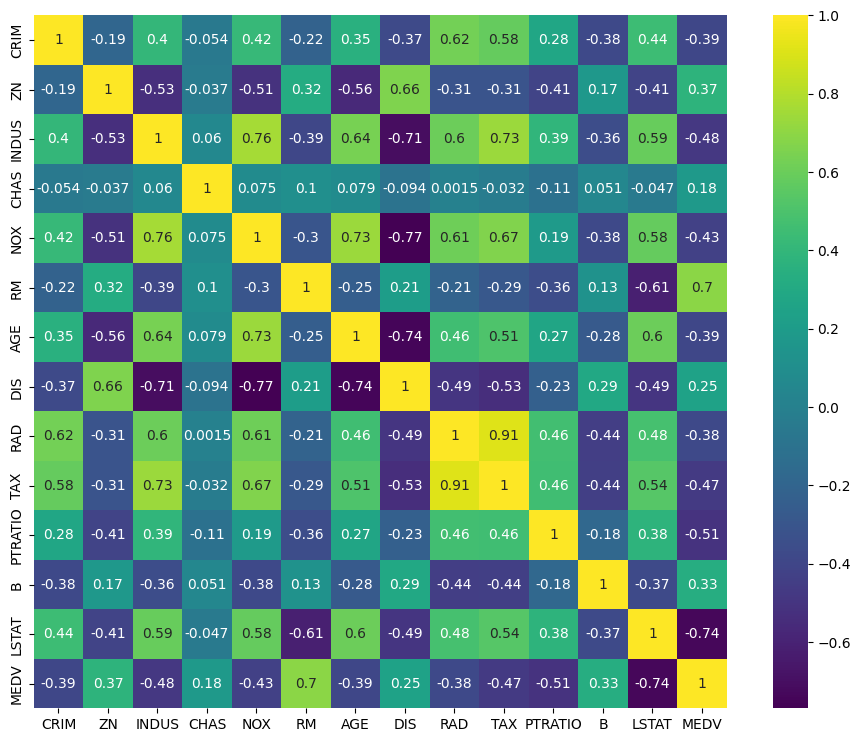

In [9]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), cmap='viridis', annot=True, square=True)
plt.show()

Also, heatmaps are often used for correlation matrices.

## Histogram

A histogram provide a graphical representation of data distribution, showing how frequently each value or range of values occurs.

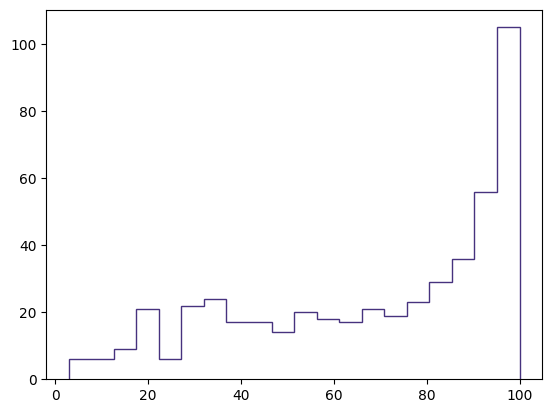

In [10]:
plt.hist(df['AGE'], align='mid', bins=20, histtype='step')
plt.show()

In this case, most houses are aged ~100, indicating a predominance of older buildings in the dataset(>100). In contrast, newer houses are less frequent(<10). The data are grouped into 20 bins, where each bin represents a range of house ages rather than a single value. Mid alignment means that each histogram bar is centered at the midpoint of its corresponding age interval.

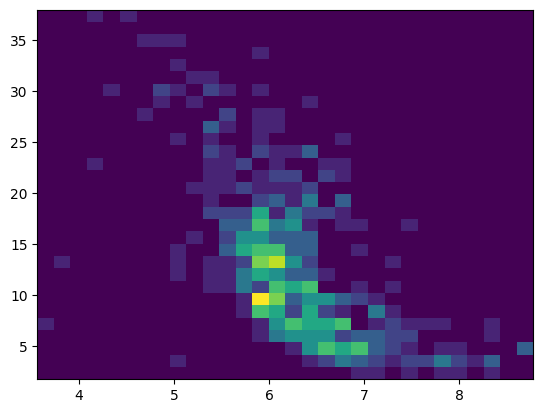

In [11]:
df_clean = df[['RM', 'LSTAT']].dropna()

plt.hist2d(df_clean['RM'], df_clean['LSTAT'], bins=30)
plt.show()

This plot visualizes the joint distribution of the RM and LSTAT features. Color intensity represents the density of observations within each region of the feature space. The concentration of high-density regions along a downward trend indicates a strong negative relationship between RM and LSTAT.

## Scatter

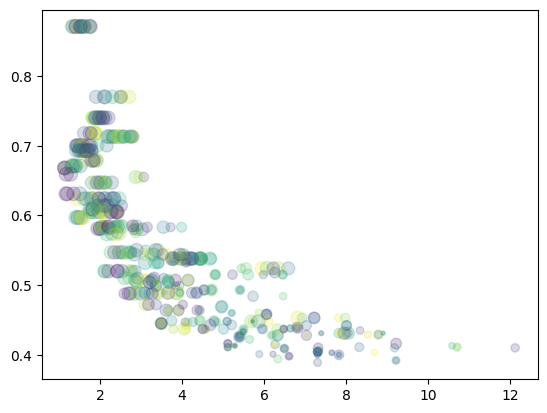

In [12]:
plt.scatter(df['DIS'], df['NOX'], c=np.random.random(df['DIS'].shape[0]).tolist(), s=df['AGE'], alpha=0.2)
plt.show()

Judging by the points, it is clear that there is a high negative correlation between these features(if a line would go through these points, it would have a negative slope). From heatmap, we see that the correlation between them is -0.77.

## Error bars

Error bars display the variability or uncertainty of points plotted.

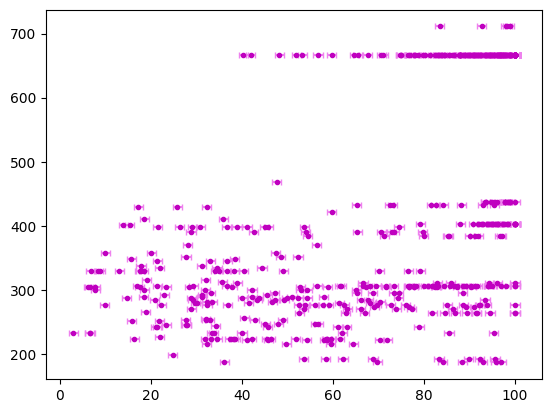

In [13]:
plt.errorbar(df['AGE'], df['TAX'], xerr=np.ones_like(df['AGE']), fmt='.m', ecolor='violet', capsize=2)
plt.show()

This is an example with AGE and TAX, with age having an error of 1. For example, they might not take into account that a house has 5 years and 11 months, putting it as 5, or they might want their house to seem older, putting instead of 99 years and 3 months 100 years.

## Contour plots

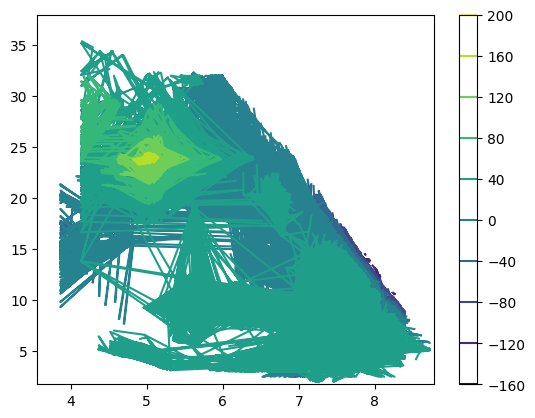

In [14]:
from scipy.interpolate import griddata

df_clean = df[['RM', 'LSTAT', 'MEDV']].dropna()

points = df_clean[['RM', 'LSTAT']].values
values = df_clean['MEDV'].values

XI, YI = np.meshgrid(df_clean['RM'], df_clean['LSTAT'])
ZI = griddata(points, values, (XI, YI), method='cubic')

plt.contour(XI, YI, ZI, cmap='viridis')
plt.colorbar()
plt.show()

The filled contour plot illustrates the relationship between the dependent variable and two independent variables using linear interpolation. Colors indicate estimated values across the feature space, while transitions between regions reflect gradual linear changes between observed data points.

## KDE plots

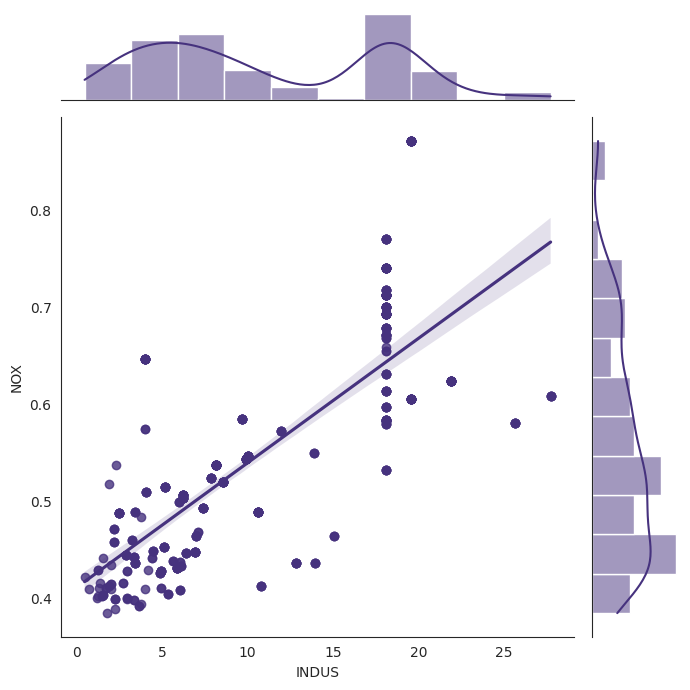

In [19]:
with sns.axes_style('white'):
  sns.jointplot(data=df, x='INDUS', y='NOX', kind='reg', height=7)

This joint plot displays the marginal histograms of NOX and INDUS along the axes, along with their joint distribution in the central panel. The scatter of points is consistent with the corresponding scatter plot of these variables. The fitted linear regression line shows a clear trend, and the relatively narrow confidence interval indicates a strong and well-defined linear relationship between NOX and INDUS(which is also shown by the high covariance between these features).

It is quite predictable, as when the area is more industrialized, the higher is the air pollution.

## Boxplot

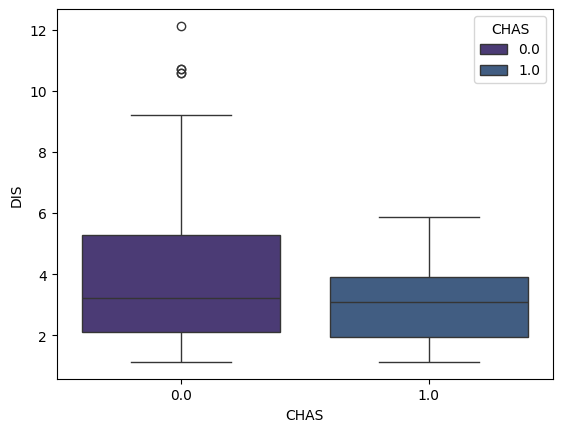

In [22]:
sns.boxplot(data=df, x='CHAS', y='DIS', hue='CHAS')
plt.show()

The median of DIS for both CHAS values is the same. For 0 CHAS, DIS has some outliers >10, which might be true as Charles River flows through the center of the city.

## Violinplot

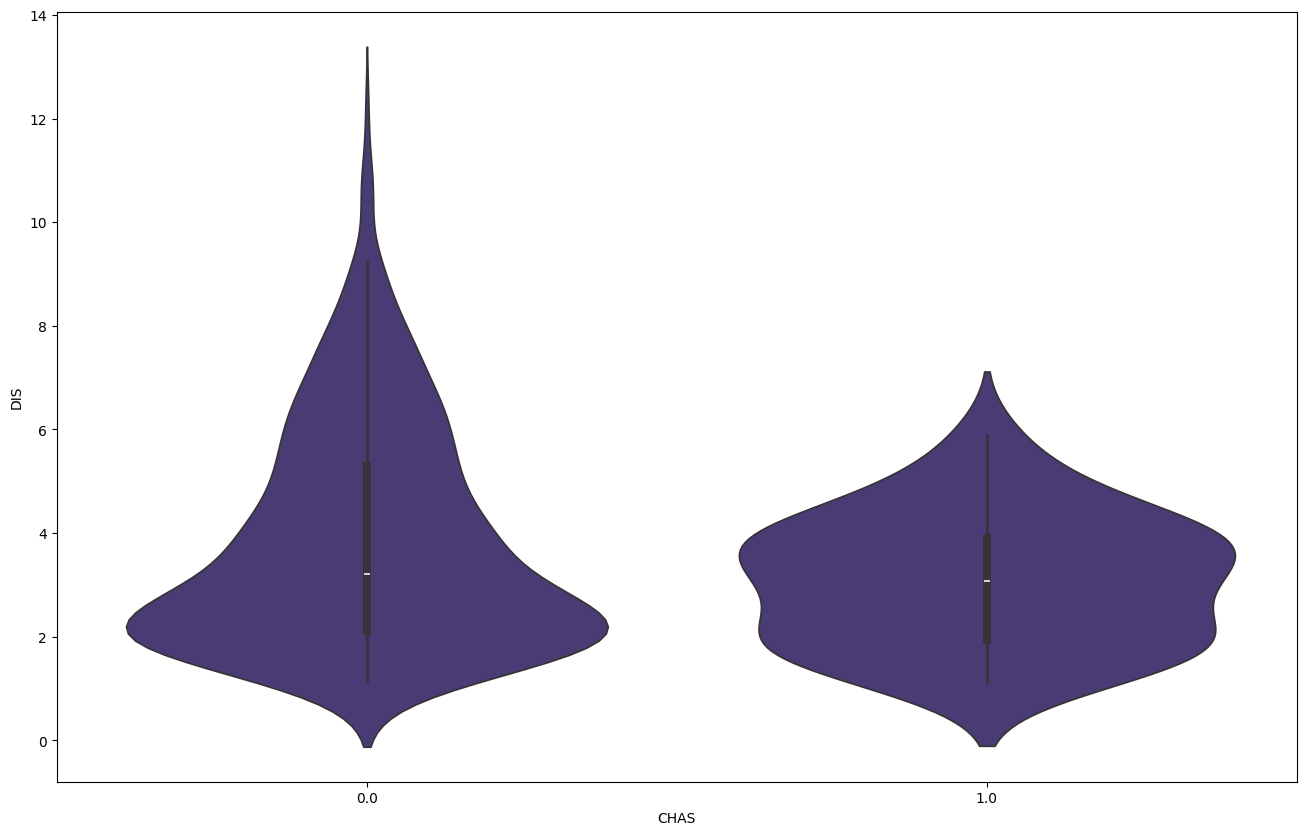

In [33]:
plt.figure(figsize=(16,10))
sns.violinplot(data=df, x='CHAS', y='DIS')
plt.show()

Again, I use the same data as it is one and only categorical 😢. The violinplot, in comparison with boxplot, also gives the idea of the distribution of the data.

## lmplot

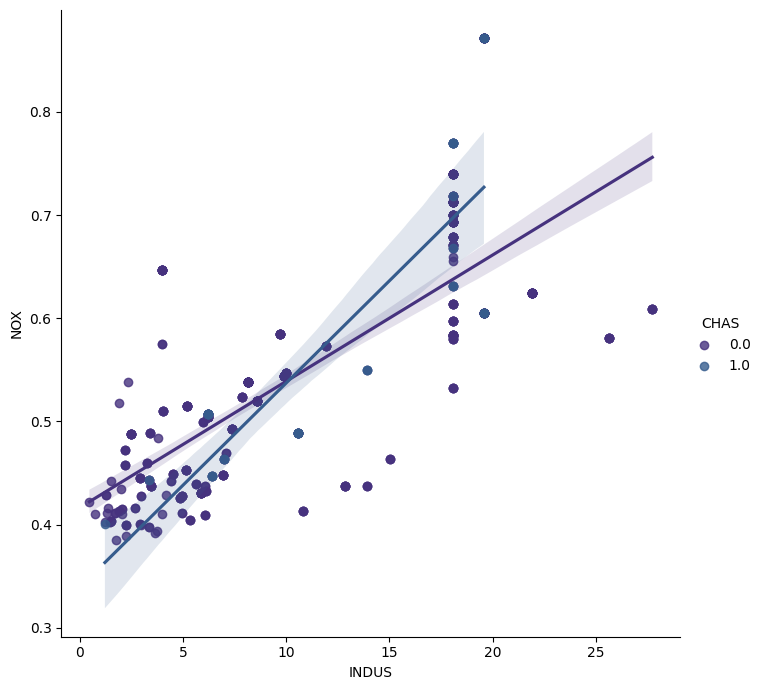

In [35]:
sns.lmplot(data=df, x='INDUS', y='NOX', hue='CHAS', height=7, aspect=1)

This plot shows the data and the regression model fitted across a FacetGrid.

## Pairplot

It just shows all the scatter plots between numerical features.(and histograms on the main diagonal)

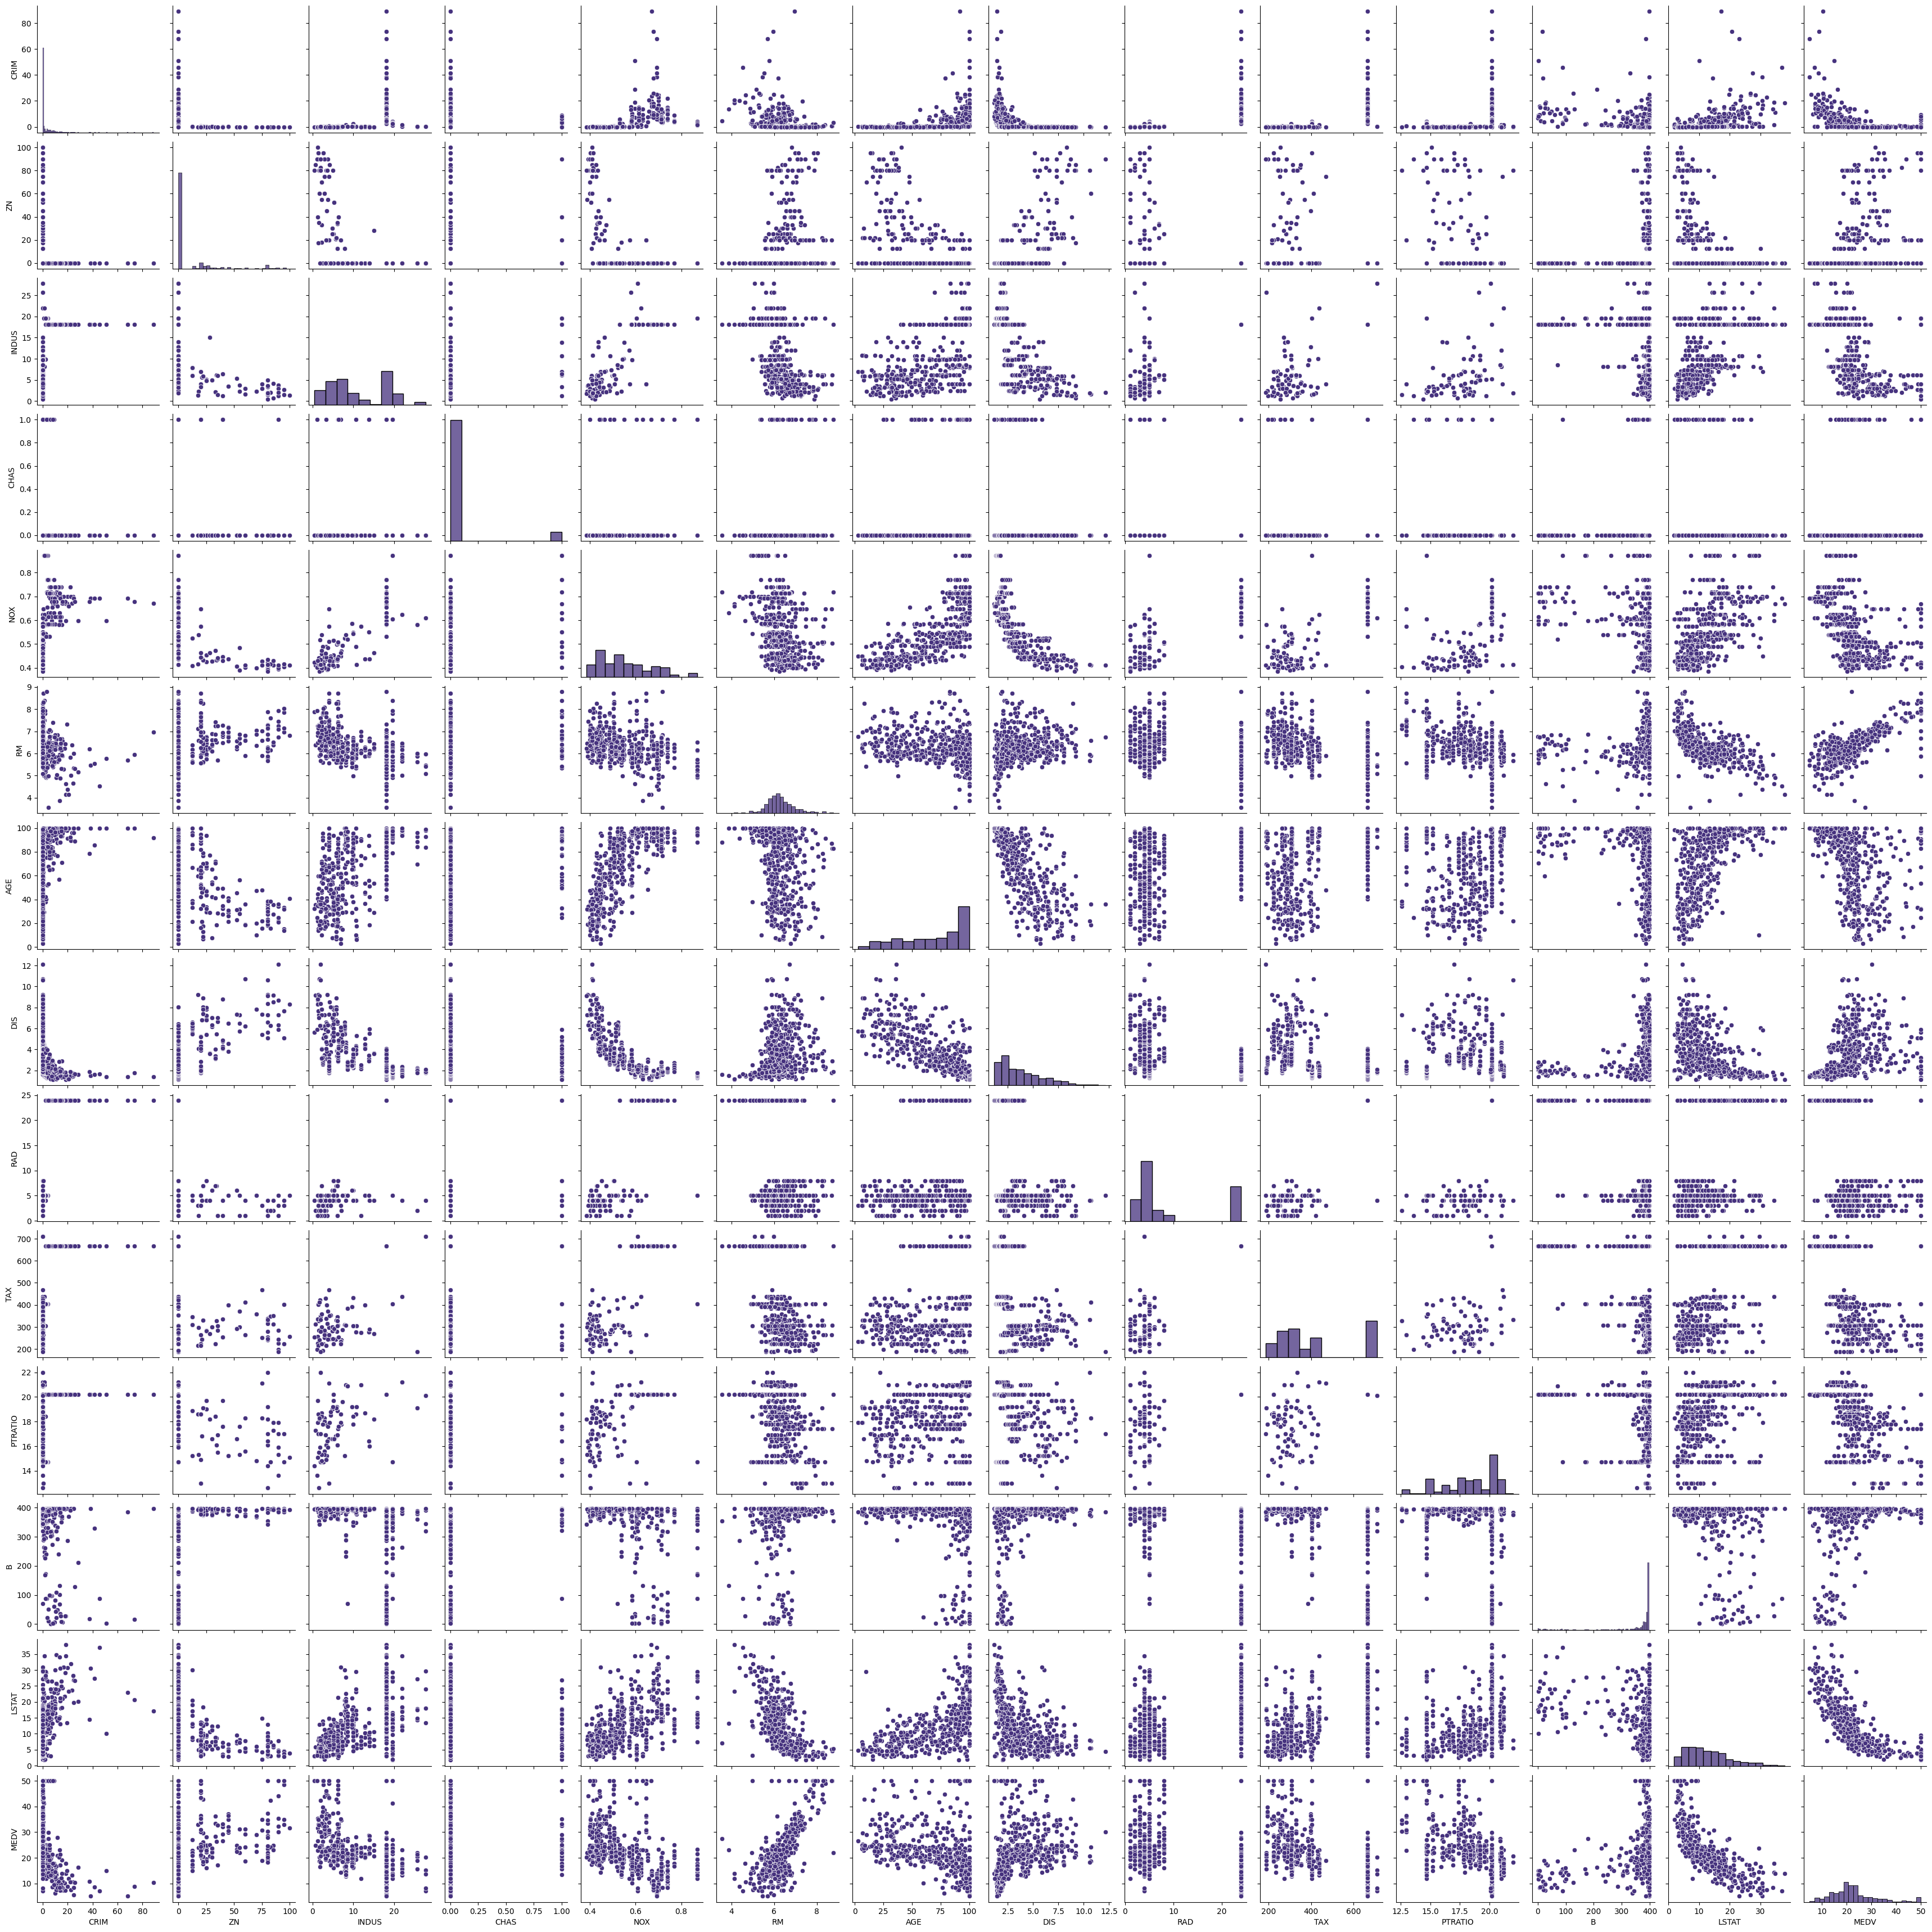

In [36]:
sns.pairplot(df)
plt.show()

## Rugplot

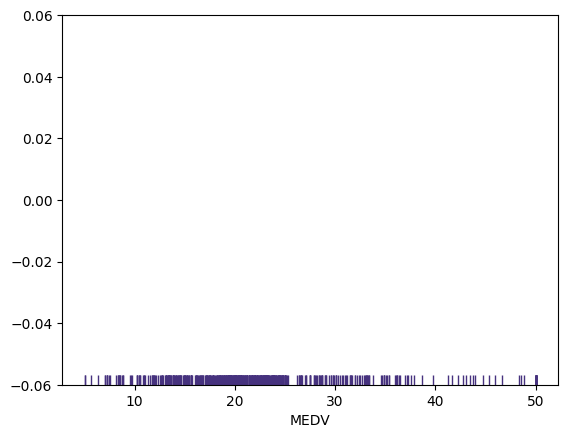

In [41]:
sns.rugplot(df['MEDV'])
plt.show()

It shows where the data is more dense or more sparse. As we see, lots of houses have a MEDV of ~20.

## Countplot

<Axes: xlabel='CHAS', ylabel='count'>

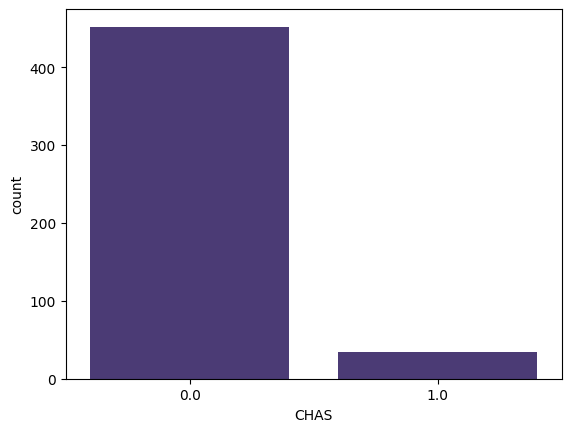

In [40]:
sns.countplot(df, x='CHAS')

It counts the amount of entries with the corresponding CHAS. As we see, the majority of the houses are not built on the banck of the river.

## Stripplot

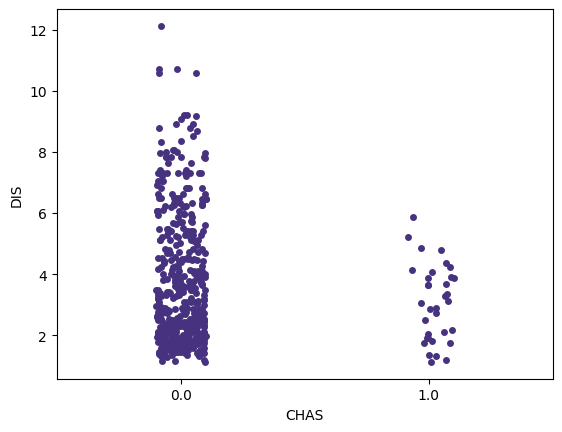

In [43]:
sns.stripplot(data=df, x='CHAS', y='DIS')
plt.show()

It shows both the density of the values and the distribution.

Also, we can use swarmplot for it.

##

In [53]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

graph = figure(title="Bokeh Bar Chart", x_axis_label='MEDV', y_axis_label='CHAS')

graph.vbar(x=df['MEDV'] - 1, top=df['CHAS'], width=0.4, color='violet', legend_label="Bill VS Tips")
graph.vbar(x=df['MEDV'] + 1, top=df['CHAS'], width=0.4, color='yellowgreen', legend_label="Tips VS Size")

graph.legend.click_policy = "hide"

show(graph)

(Just an example of an interactive plot with data with no meaning)